---

## ***Chemical reaction networks***

[Link to a book](https://www.math.uwaterloo.ca/~bingalls/MMSB/)

Let's consider a tivial decaying system:

<center><img src="1_decay.png"/></center>

The concentration of the molecule $A$ at time $t$ is $a(t)$. The rate of decaying reaction is proportional to the concentration of $A$, which leads to $ka(t)$. Thus we can write the ODE as below:

<center>$\displaystyle\frac{d}{dt}a(t) = -ka(t)$</center>

Now consider another simple system with an input:

<center><img src="2_production_n_decay.png"/></center>

There is a constant input and decay. The input is at a constant rate of $k_0$ and the rate of decay is $k_1$. Thus, the rate of change of $a(t)$ can be written as:

<center>$\displaystyle\frac{d}{dt}a(t) = k_0-k_1a(t)$</center>

Challenge for you (optional): This equation can be analytically solvable as you saw in 8-1 lecture by Professor Louis. Try to get the steady-state result by setting $da(t)/dt=0$. Then, simulate this equation with different values of $k_0$ and $k_1$, and various initial values to confirm your solution.
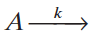
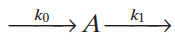

---

The following figure depicts irreversible conversion:

<center><img src="3_irreversible_conversion.png"/></center>

Let's say the concentration of the molecule $A$ and $B$ at time $t$ is $a(t)$ and $b(t)$, respectively. Then the system can be represented by the following ODEs:

<center>$\displaystyle\frac{d}{dt}a(t) = -ka(t)$</center><br>

<center>$\displaystyle\frac{d}{dt}b(t) = ka(t)$</center>

On the other hand, reversible conversion reaction is depicted as below:

<center><img src="4_reversible_conversion.png"/></center>

And it can be described by the following ODEs:

<center>$\displaystyle\frac{d}{dt}a(t) = k_-b(t)-k_+a(t)$</center><br>


<center>$\displaystyle\frac{d}{dt}b(t) = k_+a(t)-k_-b(t)$</center>

Challenge(optional): Find a steady state solution by setting $da(t)/dt=0$ and $db(t)/dt=0$. Then simulate the equation with various $k_-$ and $k_+$, and with different initial values.
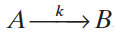
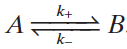

---

Now let's consider a complex chemical reaction network.

<center><img src="5_open_reaction_network.png"/></center>

where, $v_1 = k_1$,&ensp;&ensp; $v_2=k_2a(t)$,&ensp;&ensp; $v_3=k_3a(t)b(t)$,&ensp;&ensp; $v_4=k_4c(t)$,&ensp;&ensp; and $v_5=k_5d(t)$.

Then the dynamics of this reaction network can be formulated as the following ODEs:


<center>$\displaystyle\frac{d}{dt}a(t) = k_1-k_2a(t)-k_3a(t)b(t)$<center><br>

<center>$\displaystyle\frac{d}{dt}b(t) = k_2a(t)-k_3a(t)b(t)$<center><br>

<center>$\displaystyle\frac{d}{dt}c(t) = k_3a(t)b(t)-k_4c(t)$<center><br>

<center>$\displaystyle\frac{d}{dt}d(t) = k_3a(t)b(t)-k_5d(t)$<center><br>

Let take the rate constants as following:

<center>$k_1 = 3mM/s$<center><br>

<center>$k_2 = 2/s$<center><br>

<center>$k_3 = 2.5/mM/s$<center><br>

<center>$k_4 = 3/s$<center><br>

<center>$k_5 = 4/s$<center><br>
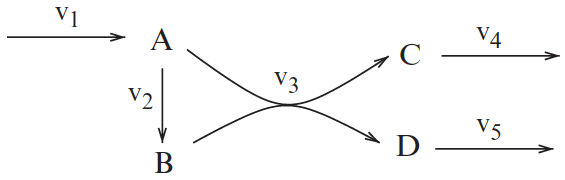

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

def open_reaction_network(t,y):
    k1 = 3
    k2 = 2
    k3 = 2.5
    k4 = 3
    k5 = 4
    
    a, b, c, d = y
    
    dadt = k1 - k2*a - k3*a*b
    dbdt = k2*a - k3*a*b
    dcdt = k3*a*b - k4*c
    dddt = k3*a*b - k5*d
    
    return np.array([dadt, dbdt, dcdt, dddt])

In [3]:
y_init = (0, 0, 0, 0)
sim_time = np.linspace(0, 4, 1000)

result = solve_ivp(open_reaction_network,
                   (sim_time[0], sim_time[-1]), 
                   y_init, 
                   t_eval=sim_time)

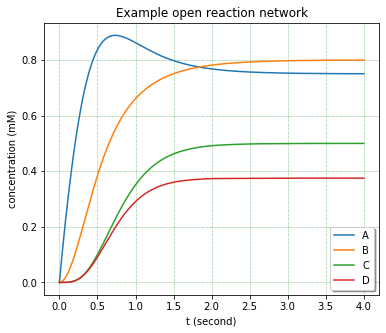

In [6]:
import matplotlib.pyplot as plt

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.figure(1, figsize=(6,5))

for i in range(4):
    plt.plot(result.t, result.y[i], color = colors[i])
    
plt.legend(['A', 'B', 'C', 'D'], shadow=True)
plt.xlabel('t (second)')
plt.ylabel('concentration (mM)')
plt.title('Example open reaction network')
plt.grid(color='g', linestyle=':', linewidth=0.5)